In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

In [11]:
class WeaponSticker():    
    global best
    best=[]
    
    def __init__(self):
        return
    
    def load_weapon(self, weapon_path):
        file0 = weapon_path
        self.wpn = cv2.imread(file0)
        
        return self.wpn
    
        
    def load_sticker(self, sticker_path):
        file1 = sticker_path
        self.stk = cv2.imread(file1)
        
        return self.stk


    
    def create_hist(self, imgs):
        self.hist1 = cv2.calcHist([self.wpn],[0],None,[256],[1,255])
        self.hist2 = cv2.calcHist([self.stk],[0],None,[256],[1,255])
        
        return self.hist1, self.hist2

    
    def correlate(self, hists):
        self.corr = cv2.compareHist(self.hist1, self.hist2, cv2.HISTCMP_CORREL)  

        return self.corr

    
    def best_fits(self, corr, weapon_path, sticker_path):
        if corr>=0.7:
            best.append(weapon_path)
            best.append(sticker_path)
            
        return best 
        
        
    def show_combinations(self, wpn, stk):
        cv2.imshow("Weapon", self.wpn)
        cv2.imshow("Sticker", self.stk)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        
        return
    
    
    def plot_correlations(self, hists, corr):
        if corr>=0.7:
            plt.plot(self.hist1, label = "Weapon")
            plt.plot(self.hist2, label = "Sticker")
            plt.show()
            print("Color Correlation: " + str(corr))
        
        return
    
    
    def resize(self, wpn, stk, dsize):
        self.wpn = cv2.resize(wpn, dsize)
        self.stk = cv2.resize(stk, dsize)
        
        return self.wpn, self.stk

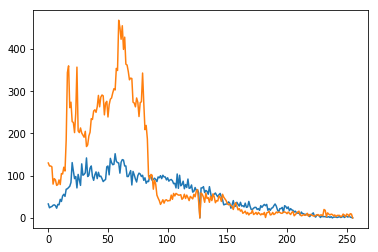

Color Correlation: 0.7754940020770165


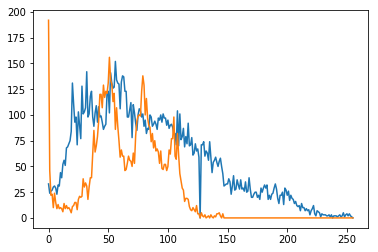

Color Correlation: 0.7145934681277678


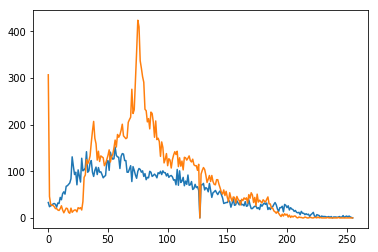

Color Correlation: 0.732654162365465


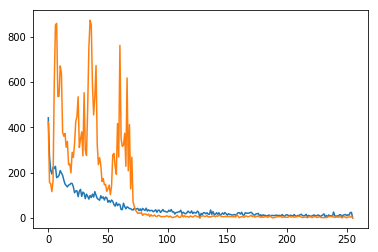

Color Correlation: 0.7005501559086904


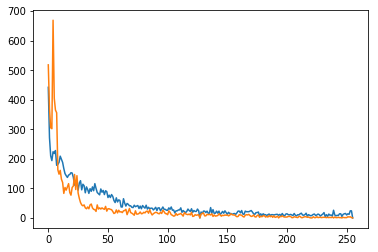

Color Correlation: 0.8419979550281058


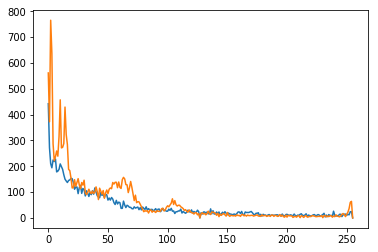

Color Correlation: 0.8723294026823288


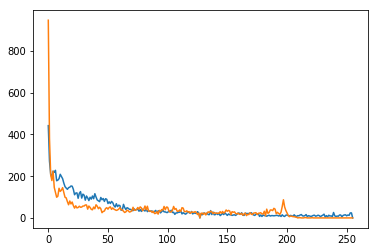

Color Correlation: 0.7893005316598966


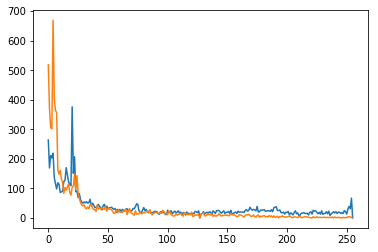

Color Correlation: 0.7681610594694309


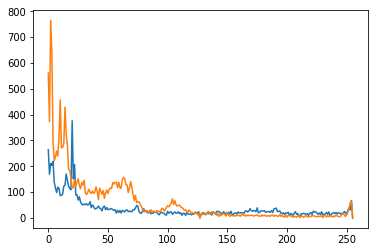

Color Correlation: 0.757799516181113


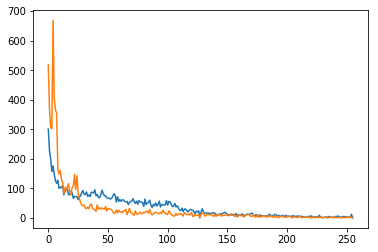

Color Correlation: 0.7901828006039497


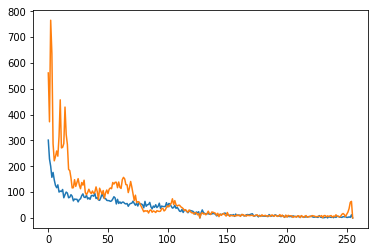

Color Correlation: 0.8619092432650329


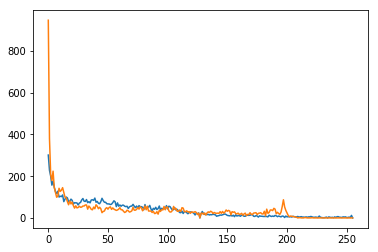

Color Correlation: 0.7728985434982101


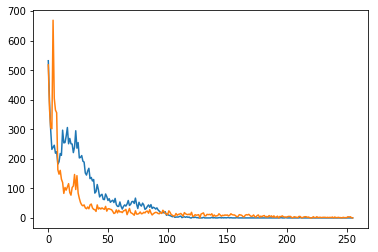

Color Correlation: 0.7562471375614056


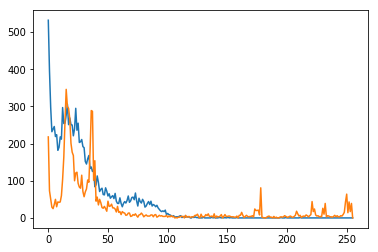

Color Correlation: 0.7402956721286951


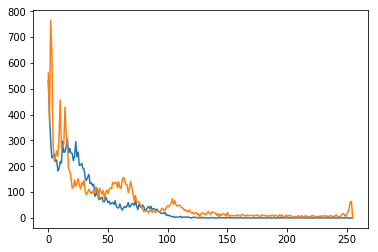

Color Correlation: 0.8313435676266537


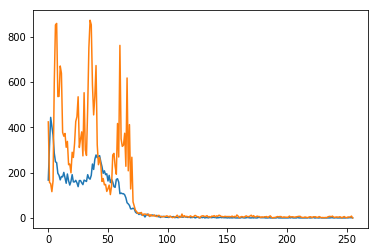

Color Correlation: 0.7453714251244243


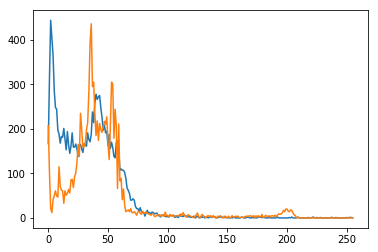

Color Correlation: 0.7161404679165162


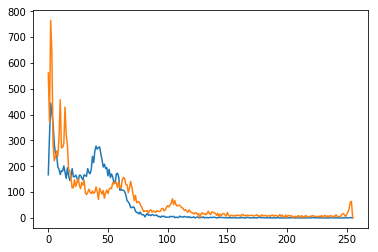

Color Correlation: 0.7952679283480198


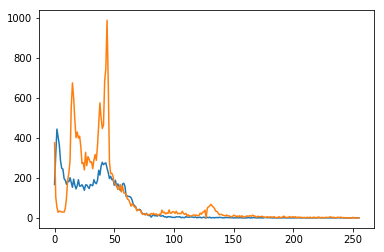

Color Correlation: 0.7093867881154986


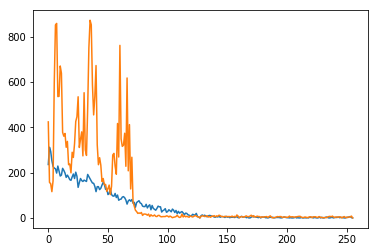

Color Correlation: 0.7779451410623899


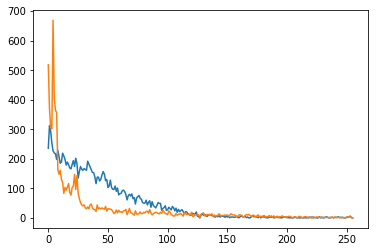

Color Correlation: 0.7005513229852798


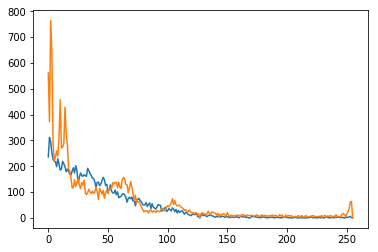

Color Correlation: 0.8414430582079963


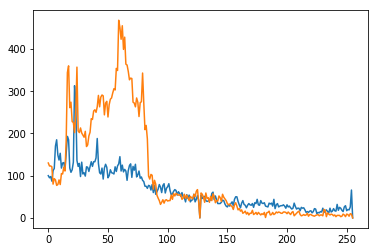

Color Correlation: 0.768547521834905


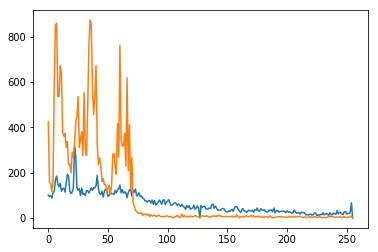

Color Correlation: 0.7409307519858649


In [12]:
WP = WeaponSticker()
weapon_path = r"C:\Users\rickt\Desktop\Projects\CS Sticker Recomender\Weapons/"
sticker_path = r"C:\Users\rickt\Desktop\Projects\CS Sticker Recomender\Stickers/"
dsize = (330, 192)
for weapon in os.listdir(weapon_path):
    wpn = WP.load_weapon(weapon_path+str(weapon))
    for sticker in os.listdir(sticker_path):
        stk = WP.load_sticker(sticker_path+str(sticker))
        resized = WP.resize(wpn, stk, dsize)
        hists = WP.create_hist(resized)
        corr = WP.correlate(hists)
        best_fits = WP.best_fits(corr, weapon_path+str(weapon), sticker_path+str(sticker))
        WP.plot_correlations(hists, corr)

        
try:
    for i in range(len(best_fits)):
        WP.show_combinations(WP.load_weapon(best_fits[i*2]), WP.load_sticker(best_fits[i*2+1]))
        
except:
    pass